In [1]:
file_path='/content/drive/MyDrive/colab_datasets/LP3-pratical-datasets/prac7/archive (2).zip'
from zipfile import ZipFile
with ZipFile(file_path,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [2]:
import pandas as pd
df = pd.read_csv('/content/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
le_gender = LabelEncoder()
df['Gender'] = le_gender.fit_transform(df['Gender'])  # Male=1, Female=0

In [5]:
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True


In [6]:
# Split features and target
X = df.drop('Exited', axis=1)
y = df['Exited']

# Standardize numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary output
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


TensorFlow: a deep learning framework.

Sequential: used to build a linear stack of layers (each layer feeds into the next one).

Dense: a fully connected layer — each neuron is connected to every neuron in the previous layer.

Dropout: a regularization technique that randomly turns off some neurons during training to prevent overfitting.

Dense(16): 16 neurons in this layer.

activation='relu': uses the ReLU (Rectified Linear Unit) function, which introduces non-linearity (helps the model learn complex relationships).

input_shape=(X_train.shape[1],): tells Keras how many input features there are — it equals the number of columns (features) in your training data.

Dense(1): only one neuron because it’s a binary classification problem — output will be a single probability value.

activation='sigmoid': squashes the output between 0 and 1, representing the probability that the customer will leave.

Closer to 1 → likely to exit

Closer to 0 → likely to stay

In [8]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Train
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4212 - loss: 0.7624 - val_accuracy: 0.8031 - val_loss: 0.5151
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7904 - loss: 0.5147 - val_accuracy: 0.8069 - val_loss: 0.4506
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8010 - loss: 0.4632 - val_accuracy: 0.8231 - val_loss: 0.4280
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8113 - loss: 0.4419 - val_accuracy: 0.8325 - val_loss: 0.4113
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8210 - loss: 0.4290 - val_accuracy: 0.8406 - val_loss: 0.3991
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8286 - loss: 0.4108 - val_accuracy: 0.8388 - val_loss: 0.3897
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8240 - loss: 0.4096 - val_accuracy: 0.8419 - val_loss: 0.3821
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8412 - loss: 0.3903 - val_accuracy: 0.

In [9]:
# Evaluate on test data
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.4f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8566 - loss: 0.3452
Test Accuracy: 0.8550


⚙️ optimizer='adam'

Adam stands for Adaptive Moment Estimation.

It’s one of the most popular optimizers for neural networks.

It automatically adjusts the learning rate for each parameter as training progresses.

💡 Think of it like a smart algorithm that decides:

“How much should I adjust each weight to reduce the error?”

So instead of updating all weights equally, it adapts — leading to faster and smoother training.

⚖️ loss='binary_crossentropy'

This is the loss function — it tells the model how wrong its predictions are.

Since this is a binary classification problem (Exited = 0 or 1), we use binary cross-entropy.

🧮 Formula (simplified):

For each sample:

𝐿
𝑜
𝑠
𝑠
=
−
[
𝑦
⋅
log
⁡
(
𝑝
)
+
(
1
−
𝑦
)
⋅
log
⁡
(
1
−
𝑝
)
]
Loss=−[y⋅log(p)+(1−y)⋅log(1−p)]

Where:

y = true label (0 or 1)

p = model’s predicted probability

💡 Meaning:

If the model predicts 0.95 for a customer who actually left (y=1) → loss is small ✅

If it predicts 0.1 for a customer who left → loss is large ❌

The model tries to minimize this loss during training.

📊 metrics=['accuracy']

This tells Keras to also track accuracy while training.

Accuracy = (Number of correct predictions) / (Total predictions)

epochs=50

The model will go through the entire training dataset 50 times.

Each pass = 1 epoch.

More epochs → better learning (up to a point), but too many → overfitting.

📦 batch_size=32

Instead of feeding all 8000+ rows at once, it splits them into mini-batches of 32 samples.

After each batch, the model updates its weights.

This makes training more efficient and stable.

✂️ validation_split=0.2

It takes 20% of your training data and holds it aside as validation data.

The model doesn’t learn from this part — it just checks its performance after each epoch.

This helps you monitor overfitting — when the model performs well on training data but poorly on unseen data.

📢 verbose=1

Controls how much output you see during training.

1 = progress bar + metrics printed for each epoch.

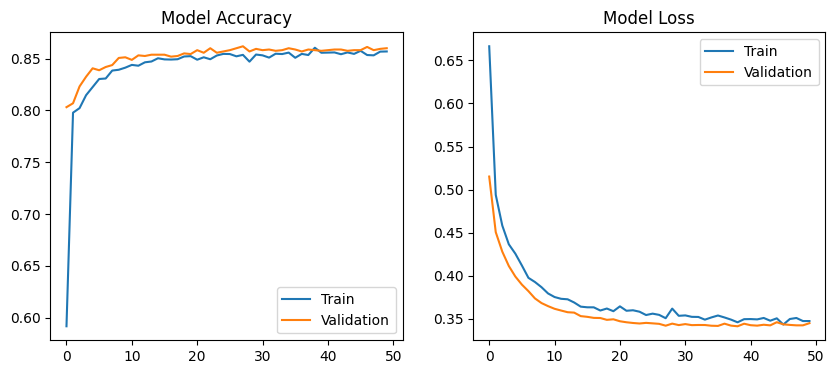

In [10]:
# Plot accuracy and loss
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.legend()
plt.show()

🔍 Interpreting the graph
1️⃣ Accuracy graph (left)

Both training and validation accuracy start around 0.6–0.8 and rise quickly to about 0.85+.

After ~10 epochs, both lines stabilize and stay close to each other.

✅ What this means:

The model is learning effectively — accuracy improves steadily.

There’s no large gap between training and validation accuracy → model generalizes well (not overfitting).

2️⃣ Loss graph (right)

Both training and validation loss decrease sharply at first — this is expected (the model is learning).

After ~10 epochs, both losses flatten around 0.33–0.35, indicating convergence.

✅ What this means:

The model’s predictions are becoming more confident and accurate.

The validation loss follows the training loss closely, showing stability and good generalization.

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
              precision    recall  f1-score   support

           0       0.87      0.97      0.91      1607
           1       0.76      0.38      0.51       393

    accuracy                           0.85      2000
   macro avg       0.81      0.68      0.71      2000
weighted avg       0.84      0.85      0.84      2000



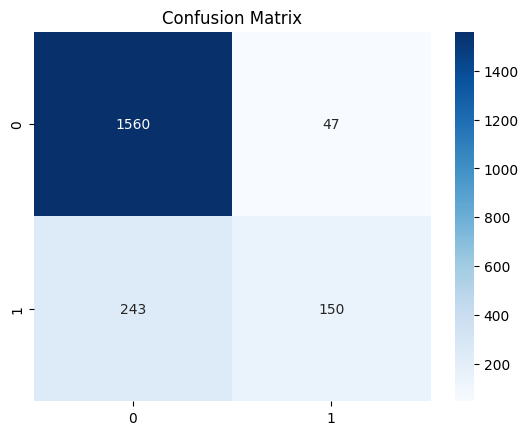

In [11]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = (model.predict(X_test) > 0.5).astype(int)

print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()
